In [1]:
# importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(11)

In [3]:
# Importing the dataset

In [4]:
adv_data = pd.read_csv("Advertising.csv")
adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
adv_data = pd.read_csv("Advertising.csv",index_col=0) ## Removing the first column
adv_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
adv_data.shape

(200, 4)

In [7]:
adv_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
# Scatter plot to view the relation between the features(Tv/radio/newspaper) and Targert(Sales) 

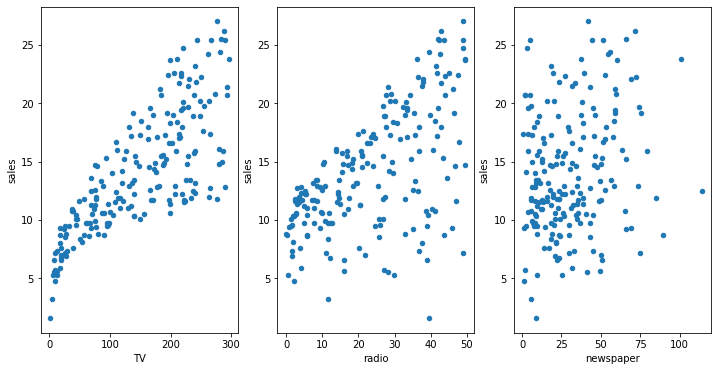

In [9]:
fig, axs = plt.subplots(1, 3)
adv_data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12,6))
adv_data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
adv_data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

In [10]:
# Checking the co-relation between the features and target

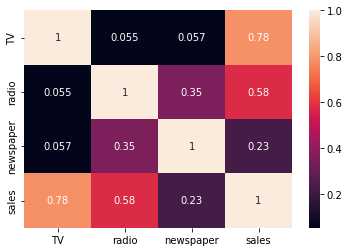

In [11]:
sns.heatmap(adv_data.corr(), annot = True);

In [12]:
## Individually doing the linear regression for all the feature

In [13]:
adv_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
# For only TV
features_TV = adv_data[['TV']].values
target_sales = adv_data[['sales']].values

In [15]:
# For only radio
features_radio = adv_data[['radio']].values
target_sales = adv_data[['sales']]

In [16]:
# For only newspaper
features_newspaper = adv_data[['newspaper']].values
target_sales = adv_data[['sales']]

In [17]:
## Splitting the data as train and test data
from sklearn.model_selection import train_test_split

In [18]:
X_train_TV,X_test_TV,y_train_TV,y_test_TV = train_test_split(features_TV,target_sales,random_state=6)

In [19]:
print(X_train_TV.shape)
print(X_test_TV.shape)
print(y_train_TV.shape)
print(y_test_TV.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [20]:
X_train_radio,X_test_radio,y_train_radio,y_test_radio = train_test_split(features_radio,target_sales,random_state=6)

In [21]:
print(X_train_radio.shape)
print(X_test_radio.shape)
print(y_train_radio.shape)
print(y_test_radio.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [22]:
X_train_newspaper,X_test_newspaper,y_train_newspaper,y_test_newspaper = train_test_split(features_newspaper,target_sales,random_state=6)

In [23]:
print(X_train_newspaper.shape)
print(X_test_newspaper.shape)
print(y_train_newspaper.shape)
print(y_test_newspaper.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [24]:
# importing the library
from sklearn.linear_model import LinearRegression

In [25]:
my_tv_model = LinearRegression()
my_radio_model = LinearRegression()
my_newspaper_model = LinearRegression()

## TV - Model Fit

In [26]:
my_tv_model.fit(X_train_TV,y_train_TV)

LinearRegression()

In [27]:
my_tv_model.coef_

array([[0.04873499]])

In [28]:
my_tv_model.intercept_

array([6.70910349])

## Radio - Model Fit

In [29]:
my_radio_model.fit(X_train_radio,y_train_radio)

LinearRegression()

In [30]:
my_radio_model.coef_

array([[0.21590796]])

In [31]:
my_radio_model.intercept_

array([9.17863927])

## Newspaper - Model Fit

In [32]:
my_newspaper_model.fit(X_train_newspaper,y_train_newspaper)

LinearRegression()

In [33]:
my_newspaper_model.coef_

array([[0.07750161]])

In [34]:
my_newspaper_model.intercept_

array([11.88037471])

## Plot the best fit Line - TV/Radio/Newspaper

In [35]:
X_new_TV = pd.DataFrame({'TV':[adv_data.TV.min(),adv_data.TV.max()]})
X_new_radio = pd.DataFrame({'radio':[adv_data.radio.min(),adv_data.radio.max()]})
X_new_newspaper = pd.DataFrame({'newspaper':[adv_data.newspaper.min(),adv_data.newspaper.max()]})
X_new_TV.head()

,TV
0,0.7
1,296.4


In [36]:
X_new_radio.head()

,radio
0,0.0
1,49.6


In [37]:
X_new_newspaper.head()

,newspaper
0,0.3
1,114.0


In [38]:
TV_pred = my_tv_model.predict(X_new_TV)
radio_pred = my_tv_model.predict(X_new_radio)
newspaper_pred = my_tv_model.predict(X_new_newspaper)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [39]:
#data.plot(kind='scatter', x='TV', y='sales')
#plt.plot(X_new,preds,c='red');

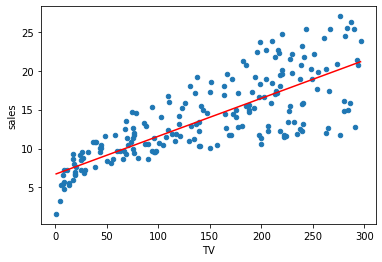

In [40]:
adv_data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new_TV,TV_pred,c='red');

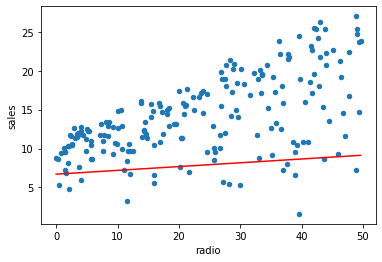

In [41]:
adv_data.plot(kind='scatter', x='radio', y='sales')
plt.plot(X_new_radio,radio_pred,c='red');

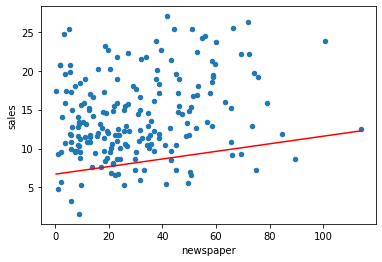

In [42]:
adv_data.plot(kind='scatter', x='newspaper', y='sales')
plt.plot(X_new_newspaper,newspaper_pred,c='red');

## STAT - Calculation

In [43]:
import statsmodels.formula.api as smf

In [44]:
adv_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [45]:
my_stat_model_TV = smf.ols(formula='sales ~ TV', data=adv_data).fit()
my_stat_model_TV.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [46]:
my_stat_model_radio = smf.ols(formula='sales ~ radio', data=adv_data).fit()
my_stat_model_radio.pvalues

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64

In [47]:
my_stat_model_newspaper = smf.ols(formula='sales ~ newspaper', data=adv_data).fit()
my_stat_model_newspaper.pvalues

Intercept    4.713507e-49
newspaper    1.148196e-03
dtype: float64

In [48]:
my_stat_model_TV.rsquared

0.611875050850071

In [49]:
my_stat_model_radio.rsquared

0.33203245544529525

In [50]:
my_stat_model_newspaper.rsquared

0.05212044544430516

# Model Predication - for Train data - TV/Radio/Newspaper

In [52]:
model_TV_pred_train = my_tv_model.predict(X_train_TV)
model_radio_pred_train = my_radio_model.predict(X_train_radio)
model_newspaper_pred_train = my_newspaper_model.predict(X_train_newspaper)

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
#MAE
TV_MAE_train = mean_absolute_error(model_TV_pred_train,y_train_TV)
Radio_MAE_train = mean_absolute_error(model_radio_pred_train,y_train_TV)
Newspaper_MAE_train = mean_absolute_error(model_newspaper_pred_train,y_train_TV)
print(" Mean Absolute Error_Train_data - TV - 'Predicted' and 'Actual_Test' value is :{}".format(round(TV_MAE_train,3)))
print(" Mean Absolute Error_Train_data - Radio - 'Predicted' and 'Actual_Test' value is :{}".format(round(Radio_MAE_train,3)))
print(" Mean Absolute Error_Train_data - Newspaper - 'Predicted' and 'Actual_Test' value is :{}".format(round(Newspaper_MAE_train,3)))

 Mean Absolute Error_Train_data - TV - 'Predicted' and 'Actual_Test' value is :2.56
 Mean Absolute Error_Train_data - Radio - 'Predicted' and 'Actual_Test' value is :3.297
 Mean Absolute Error_Train_data - Newspaper - 'Predicted' and 'Actual_Test' value is :4.171


In [55]:
#MSE
TV_MSE_train = mean_squared_error(model_TV_pred_train,y_train_TV)
Radio_MSE_train = mean_squared_error(model_radio_pred_train,y_train_TV)
Newspaper_MSE_train = mean_squared_error(model_newspaper_pred_train,y_train_TV)
print(" Mean Squared Error_Train_data - TV - 'Predicted' and 'Actual_Test' value is :{}".format(round(TV_MSE_train,3)))
print(" Mean Squared Error_Train_data - Radio - 'Predicted' and 'Actual_Test' value is :{}".format(round(Radio_MSE_train,3)))
print(" Mean Squared Error_Train_Data - Newspaper - 'Predicted' and 'Actual_Test' value is :{}".format(round(Newspaper_MSE_train,3)))

 Mean Squared Error_Train_data - TV - 'Predicted' and 'Actual_Test' value is :10.892
 Mean Squared Error_Train_data - Radio - 'Predicted' and 'Actual_Test' value is :18.476
 Mean Squared Error_Train_Data - Newspaper - 'Predicted' and 'Actual_Test' value is :26.4


In [134]:
#RMSE
TV_RMSE_train = np.sqrt(mean_squared_error(model_TV_pred_train,y_train_TV))
Radio_RMSE_train = np.sqrt(mean_squared_error(model_radio_pred_train,y_train_TV))
Newspaper_RMSE_train = np.sqrt(mean_squared_error(model_newspaper_pred_train,y_train_TV))
print(" Root Mean Squared Error_Train_data - TV - 'Predicted' and 'Actual_Test' value is :{}".format(round(TV_RMSE_train,3)))
print(" Root Mean Squared Error_Train_data - Radio - 'Predicted' and 'Actual_Test' value is :{}".format(round(Radio_RMSE_train,3)))
print(" Root Mean Squared Error_Train_data - Newspaper - 'Predicted' and 'Actual_Test' value is :{}".format(round(Newspaper_RMSE_train,3)))

 Root Mean Squared Error_Train_data - TV - 'Predicted' and 'Actual_Test' value is :3.3
 Root Mean Squared Error_Train_data - Radio - 'Predicted' and 'Actual_Test' value is :4.298
 Root Mean Squared Error_Train_data - Newspaper - 'Predicted' and 'Actual_Test' value is :5.138


In [57]:
# R- Squared on test data 
TV_R2_train = my_tv_model.score(X_train_TV,y_train_TV)
Radio_R2_train = my_radio_model.score(X_train_radio,y_train_radio)
Newspaper_R2_train = my_newspaper_model.score(X_train_newspaper,y_train_newspaper)
print(" R-squared value on Train Data - TV :{}".format(round(TV_R2_train,3)))
print(" R-squared value on Train Data - Radio :{}".format(round(Radio_R2_train,3)))
print(" R-squared value on Train Data - Newspaper :{}".format(round(Newspaper_R2_train,3)))

 R-squared value on Train Data - TV :0.623
 R-squared value on Train Data - Radio :0.361
 R-squared value on Train Data - Newspaper :0.087


# Model Predication - for new data(Test data) - TV/Radio/Newspaper

In [58]:
model_TV_pred = my_tv_model.predict(X_test_TV)
model_radio_pred = my_radio_model.predict(X_test_radio)
model_newspaper_pred = my_newspaper_model.predict(X_test_newspaper)

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Error - Predicted and Actual - Test data 

In [60]:
#MAE
TV_MAE = mean_absolute_error(model_TV_pred,y_test_TV)
Radio_MAE = mean_absolute_error(model_radio_pred,y_test_TV)
Newspaper_MAE = mean_absolute_error(model_newspaper_pred,y_test_TV)
print(" Mean Absolute Error - TV - 'Predicted' and 'Actual_Test' value is :{}".format(round(TV_MAE,3)))
print(" Mean Absolute Error - Radio - 'Predicted' and 'Actual_Test' value is :{}".format(round(Radio_MAE,3)))
print(" Mean Absolute Error - Newspaper - 'Predicted' and 'Actual_Test' value is :{}".format(round(Newspaper_MAE,3)))

 Mean Absolute Error - TV - 'Predicted' and 'Actual_Test' value is :2.469
 Mean Absolute Error - Radio - 'Predicted' and 'Actual_Test' value is :3.294
 Mean Absolute Error - Newspaper - 'Predicted' and 'Actual_Test' value is :4.156


In [61]:
#MSE
TV_MSE = mean_squared_error(model_TV_pred,y_test_radio)
Radio_MSE = mean_squared_error(model_radio_pred,y_test_radio)
Newspaper_MSE = mean_squared_error(model_newspaper_pred,y_test_radio)
print(" Mean Squared Error - TV - 'Predicted' and 'Actual_Test' value is :{}".format(round(TV_MSE,3)))
print(" Mean Squared Error - Radio - 'Predicted' and 'Actual_Test' value is :{}".format(round(Radio_MSE,3)))
print(" Mean Squared Error - Newspaper - 'Predicted' and 'Actual_Test' value is :{}".format(round(Newspaper_MSE,3)))

 Mean Squared Error - TV - 'Predicted' and 'Actual_Test' value is :9.503
 Mean Squared Error - Radio - 'Predicted' and 'Actual_Test' value is :17.228
 Mean Squared Error - Newspaper - 'Predicted' and 'Actual_Test' value is :24.681


In [62]:
#RMSE
TV_RMSE = np.sqrt(mean_squared_error(model_TV_pred,y_test_newspaper))
Radio_RMSE = np.sqrt(mean_squared_error(model_radio_pred,y_test_newspaper))
Newspaper_RMSE = np.sqrt(mean_squared_error(model_newspaper_pred,y_test_newspaper))
print(" Root Mean Squared Error - TV - 'Predicted' and 'Actual_Test' value is :{}".format(round(TV_RMSE,3)))
print(" Root Mean Squared Error - Radio - 'Predicted' and 'Actual_Test' value is :{}".format(round(Radio_RMSE,3)))
print(" Root Mean Squared Error - Newspaper - 'Predicted' and 'Actual_Test' value is :{}".format(round(Newspaper_RMSE,3)))

 Root Mean Squared Error - TV - 'Predicted' and 'Actual_Test' value is :3.083
 Root Mean Squared Error - Radio - 'Predicted' and 'Actual_Test' value is :4.151
 Root Mean Squared Error - Newspaper - 'Predicted' and 'Actual_Test' value is :4.968


In [63]:
##print('R-squared on Train Data :', my_mlr_model.score(X_train, y_train)) --> Reference line

# R- Squared on test data 
TV_R2 = my_tv_model.score(X_test_TV,y_test_TV)
Radio_R2 = my_radio_model.score(X_test_radio,y_test_radio)
Newspaper_R2 = my_newspaper_model.score(X_test_newspaper,y_test_newspaper)
print(" R-squared value on Test Data - TV :{}".format(round(TV_R2,3)))
print(" R-squared value on Test Data - Radio :{}".format(round(Radio_R2,3)))
print(" R-squared value on Test Data - Newspaper :{}".format(round(Newspaper_R2,3)))

 R-squared value on Test Data - TV :0.56
 R-squared value on Test Data - Radio :0.202
 R-squared value on Test Data - Newspaper :-0.143


## **********Multiple Linear Regression******************

In [64]:
adv_data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [65]:
adv_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [66]:
features_all = adv_data[['TV','radio','newspaper']]
target_all = adv_data[['sales']]

In [67]:
features_all.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [68]:
target_all.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


# 1- Splitting the data as Train and test

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all,target_all,random_state=10,test_size=.20)

In [71]:
# Getting the shape of the train and split data
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [72]:
# call the model

In [73]:
my_mlr_model = LinearRegression()
my_mlr_model

LinearRegression()

In [74]:
my_mlr_model.fit(X_train_all,y_train_all)

LinearRegression()

In [75]:
my_mlr_model.coef_

array([[ 0.0437726 ,  0.19343299, -0.00222879]])

In [76]:
my_mlr_model.intercept_

array([3.25409711])

# Multiple linear regression - Model predict for new data (X_test)

In [82]:
MLR_predict = my_mlr_model.predict(X_test_all)

### Evaluation on Train data

In [83]:
MLR_predict_train = my_mlr_model.predict(X_train_all)
print('MAE on Train Data :', mean_absolute_error(MLR_predict_train,y_train_all))
print('MSE on Train Data :', mean_squared_error(MLR_predict_train,y_train_all))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(MLR_predict_train,y_train_all)))
print('R-squared on Train Data :', my_mlr_model.score(X_train_all, y_train_all))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492499
RMSE on Train Data : 1.3633035872281896
R-squared on Train Data : 0.9209087553499528


## Evaluatio on test data

In [84]:
MLR_predict_test = my_mlr_model.predict(X_test_all)
#MLR_predict_test

In [85]:
MLR_predict_test = my_mlr_model.predict(X_test_all)
print('MAE on Test Data :', mean_absolute_error(MLR_predict_test,y_test_all))
print('MSE on Test Data :', mean_squared_error(MLR_predict_test,y_test_all))
print('RMSE on Test Data :', np.sqrt(mean_squared_error(MLR_predict_test,y_test_all)))
print('R-squared on Test Data :', my_mlr_model.score(X_test_all, y_test_all))

MAE on Test Data : 1.8850130310423148
MSE on Test Data : 6.700486756528875
RMSE on Test Data : 2.58852984462781
R-squared on Test Data : 0.8353672324670594


## OLS Model

In [86]:
my_ols_model = smf.ols(formula='sales ~ TV + radio + newspaper', data = adv_data).fit()

In [87]:
my_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        22:43:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## *********************  Polynominal Regression   ***************************

In [88]:
adv_data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [89]:
# Importing the necessary library for polynominal Regression
from sklearn.preprocessing import PolynomialFeatures

In [90]:
adv_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

## converting the Features to Polynominal features - Degree 2

In [92]:
features_poly = PolynomialFeatures(degree=2)
TV_poly2 = features_poly.fit_transform(features_all[['TV']])
radio_poly2 = features_poly.fit_transform(features_all[['radio']])
newspaper_poly2 = features_poly.fit_transform(features_all[['newspaper']])

In [93]:
# Checking the data - How will it looks in polynominal degree 2
pd.DataFrame(TV_poly2, columns = ['constant', 'TV', 'TV-squared'])

,constant,TV,TV-squared
0,1.0,230.1,52946.01
1,1.0,44.5,1980.25
2,1.0,17.2,295.84
3,1.0,151.5,22952.25
4,1.0,180.8,32688.64
...,...,...,...
195,1.0,38.2,1459.24
196,1.0,94.2,8873.64
197,1.0,177.0,31329.00
198,1.0,283.6,80428.96


In [94]:
features_poly2 = pd.concat([pd.DataFrame(TV_poly2),pd.DataFrame(radio_poly2),pd.DataFrame(newspaper_poly2)],axis=1)
features_poly2

,0,1,2,0,1,2,0,1,2
0,1.0,230.1,52946.01,1.0,37.8,1428.84,1.0,69.2,4788.64
1,1.0,44.5,1980.25,1.0,39.3,1544.49,1.0,45.1,2034.01
2,1.0,17.2,295.84,1.0,45.9,2106.81,1.0,69.3,4802.49
3,1.0,151.5,22952.25,1.0,41.3,1705.69,1.0,58.5,3422.25
4,1.0,180.8,32688.64,1.0,10.8,116.64,1.0,58.4,3410.56
...,...,...,...,...,...,...,...,...,...
195,1.0,38.2,1459.24,1.0,3.7,13.69,1.0,13.8,190.44
196,1.0,94.2,8873.64,1.0,4.9,24.01,1.0,8.1,65.61
197,1.0,177.0,31329.00,1.0,9.3,86.49,1.0,6.4,40.96
198,1.0,283.6,80428.96,1.0,42.0,1764.00,1.0,66.2,4382.44


In [95]:
target_all

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [96]:
# Splitting the data - test and train

In [97]:
X_train_poly2, X_test_poly2, y_train_poly2, y_test_poly2 = train_test_split(features_poly2,target_all,random_state=6)

In [98]:
print(X_train_poly2.shape)
print(X_test_poly2.shape)
print(y_train_poly2.shape)
print(y_test_poly2.shape)

(150, 9)
(50, 9)
(150, 1)
(50, 1)


In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
my_model_ploy2 = LinearRegression()
my_model_ploy2

LinearRegression()

In [101]:
my_model_ploy2.fit(X_train_poly2,y_train_poly2)

LinearRegression()

In [102]:
my_model_ploy2.coef_

array([[ 0.00000000e+00,  7.76366570e-02, -1.12220872e-04,
         6.95624114e-16,  1.46025928e-01,  9.36830450e-04,
        -2.77555756e-17,  2.13781336e-02, -2.07802344e-04]])

In [103]:
my_model_ploy2.intercept_

array([1.41776908])

# Prediction and Evaluation on Train data - Degree 2

In [104]:
pred_poly2_train = my_model_ploy2.predict(X_train_poly2)
print("Mean Absolute Error for Deg-2 : ",mean_absolute_error(pred_poly2_train,y_train_poly2))
print("Mean Squared Error for  Deg-2 : ",mean_squared_error(pred_poly2_train,y_train_poly2))
print("RMSE for Deg-2 : ", np.sqrt(mean_squared_error(pred_poly2_train,y_train_poly2)))
print("R2 Score for Deg-2 : ",my_model_ploy2.score(X_train_poly2,y_train_poly2))

Mean Absolute Error for Deg-2 :  1.2028934896198527
Mean Squared Error for  Deg-2 :  2.488776665854576
RMSE for Deg-2 :  1.5775857079266964
R2 Score for Deg-2 :  0.9139135358655949


# Predication and Evaluation on Test data - Degree 2

In [105]:
pred_poly2_test = my_model_ploy2.predict(X_test_poly2)
print("Mean Absolute Error for Deg-2 : ",mean_absolute_error(pred_poly2_test,y_test_poly2))
print("Mean Squared Error for  Deg-2 : ",mean_squared_error(pred_poly2_test,y_test_poly2))
print("RMSE for Deg-2 : ", np.sqrt(mean_squared_error(pred_poly2_test,y_test_poly2)))
print("R2 Score for Deg-2 : ",my_model_ploy2.score(X_test_poly2,y_test_poly2))

Mean Absolute Error for Deg-2 :  0.991274151067495
Mean Squared Error for  Deg-2 :  1.527021925756564
RMSE for Deg-2 :  1.2357272861584647
R2 Score for Deg-2 :  0.9293009924314459


### **********Calculation on other poynominal degress(3/5/10/100/150) -- This is for observation

In [106]:
## Orginal source data 
adv_data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [107]:
# Columns of the dataset
adv_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [109]:
# Importing the necessary library for polynominal Regression
from sklearn.preprocessing import PolynomialFeatures

## Converting the features to polynominal feature

## Degree--> 3
#-----------------------------------------------

features_poly3 = PolynomialFeatures(degree=3)
TV_poly3 = features_poly3.fit_transform(features_all[['TV']])
radio_poly3 = features_poly3.fit_transform(features_all[['radio']])
newspaper_poly3 = features_poly3.fit_transform(features_all[['newspaper']])

## Degree--> 5
#-----------------------------------------------

features_poly5 = PolynomialFeatures(degree=5)
TV_poly5 = features_poly5.fit_transform(features_all[['TV']])
radio_poly5 = features_poly5.fit_transform(features_all[['radio']])
newspaper_poly5 = features_poly5.fit_transform(features_all[['newspaper']])

## Degree--> 10
#-----------------------------------------------

features_poly10 = PolynomialFeatures(degree=10)
TV_poly10 = features_poly10.fit_transform(features_all[['TV']])
radio_poly10 = features_poly10.fit_transform(features_all[['radio']])
newspaper_poly10 = features_poly10.fit_transform(features_all[['newspaper']])

## Degree--> 100
#-----------------------------------------------

features_poly100 = PolynomialFeatures(degree=100)
TV_poly100 = features_poly100.fit_transform(features_all[['TV']])
radio_poly100 = features_poly100.fit_transform(features_all[['radio']])
newspaper_poly100 = features_poly100.fit_transform(features_all[['newspaper']])

## Degree--> 150
#-----------------------------------------------

features_poly150 = PolynomialFeatures(degree=150)
TV_poly150 = features_poly150.fit_transform(features_all[['TV']])
radio_poly150 = features_poly150.fit_transform(features_all[['radio']])
newspaper_poly150 = features_poly150.fit_transform(features_all[['newspaper']])

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_polynomial.py:469: RuntimeWarning: overflow encountered in multiply
  casting="no",
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_polynomial.py:469: RuntimeWarning: overflow encountered in multiply
  casting="no",


In [110]:
## Concatenate the data 
#features_poly2 = pd.concat([pd.DataFrame(TV_poly2),pd.DataFrame(radio_poly2),pd.DataFrame(newspaper_poly2)],axis=1)
#features_poly2
features_poly3 = pd.concat([pd.DataFrame(TV_poly3),pd.DataFrame(radio_poly3),pd.DataFrame(newspaper_poly3)],axis=1)
features_poly5 = pd.concat([pd.DataFrame(TV_poly5),pd.DataFrame(radio_poly5),pd.DataFrame(newspaper_poly5)],axis=1)
features_poly10 = pd.concat([pd.DataFrame(TV_poly10),pd.DataFrame(radio_poly10),pd.DataFrame(newspaper_poly10)],axis=1)
features_poly100 = pd.concat([pd.DataFrame(TV_poly100),pd.DataFrame(radio_poly100),pd.DataFrame(newspaper_poly100)],axis=1)
features_poly150 = pd.concat([pd.DataFrame(TV_poly150),pd.DataFrame(radio_poly150),pd.DataFrame(newspaper_poly150)],axis=1)

In [111]:
# Shape of the polynominal feature
print(features_poly3.shape)
print(features_poly5.shape)
print(features_poly10.shape)
print(features_poly100.shape)
print(features_poly150.shape)

(200, 12)
(200, 18)
(200, 33)
(200, 303)
(200, 453)


In [113]:
target_all

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [114]:
# Splitting the data - test and train

In [116]:
X_train_poly3, X_test_poly3, y_train_poly3, y_test_poly3 = train_test_split(features_poly3,target_all,random_state=6)           ## Degree -->3 (Data split - Train and Test)
X_train_poly5, X_test_poly5, y_train_poly5, y_test_poly5 = train_test_split(features_poly5,target_all,random_state=6)           ## Degree -->5 (Data split - Train and Test)
X_train_poly10, X_test_poly10, y_train_poly10, y_test_poly10 = train_test_split(features_poly10,target_all,random_state=6)      ## Degree -->10 (Data split - Train and Test)
X_train_poly100, X_test_poly100, y_train_poly100, y_test_poly100 = train_test_split(features_poly100,target_all,random_state=6) ## Degree -->100 (Data split - Train and Test)
X_train_poly150, X_test_poly150, y_train_poly150, y_test_poly150 = train_test_split(features_poly150,target_all,random_state=6) ## Degree -->150 (Data split - Train and Test)

In [117]:
print(X_train_poly3.shape)
print(X_test_poly3.shape)
print(y_train_poly3.shape)
print(y_test_poly3.shape)

(150, 12)
(50, 12)
(150, 1)
(50, 1)


In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
my_model_ploy3 = LinearRegression()
my_model_ploy5 = LinearRegression()
my_model_ploy10 = LinearRegression()
my_model_ploy100 = LinearRegression()
my_model_ploy150 = LinearRegression()

In [120]:
my_model_ploy3.fit(X_train_poly3,y_train_poly3)
my_model_ploy5.fit(X_train_poly5,y_train_poly5)
my_model_ploy10.fit(X_train_poly10,y_train_poly10)
my_model_ploy100.fit(X_train_poly100,y_train_poly100)
#my_model_ploy150.fit(X_train_poly150,y_train_poly150)

LinearRegression()

In [135]:
my_model_ploy150.fit(X_train_poly150,y_train_poly150)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [121]:
#print("Poly Degree 3 Coefficent : ", my_model_ploy3.coef_)
#print("Poly Degree 3 Coefficent : ", my_model_ploy3.coef_)
#print("Poly Degree 3 Coefficent : ", my_model_ploy3.coef_)
#print("Poly Degree 3 Coefficent : ", my_model_ploy3.coef_)
#print("Poly Degree 3 Coefficent : ", my_model_ploy3.coef_)

# Prediction and Evaluation on Train data - Degree 3/5/10/100/150

In [122]:
# pred_poly2_train = my_model_ploy2.predict(X_train_poly2)
# print("Mean Absolute Error for Deg-2 : ",mean_absolute_error(pred_poly2_train,y_train_poly2))
# print("Mean Squared Error for  Deg-2 : ",mean_squared_error(pred_poly2_train,y_train_poly2))
# print("R2 Score for Deg-2 : ",my_model_ploy2.score(X_train_poly2,y_train_poly2))

## Polynominal Degree 3 - Train data

In [123]:
pred_poly3_train = my_model_ploy3.predict(X_train_poly3)
print("Mean Absolute Error for Deg-3 : ",mean_absolute_error(pred_poly3_train,y_train_poly3))
print("Mean Squared Error for  Deg-3 : ",mean_squared_error(pred_poly3_train,y_train_poly3))
print("RMSE for Deg-100 : ", np.sqrt(mean_squared_error(pred_poly3_train,y_train_poly3)))
print("R2 Score for Deg-3 : ",my_model_ploy3.score(X_train_poly3,y_train_poly3))

Mean Absolute Error for Deg-3 :  1.0981257976964192
Mean Squared Error for  Deg-3 :  2.120643703536337
RMSE for Deg-100 :  1.456243009781107
R2 Score for Deg-3 :  0.926647207589578


## Polynominal Degree 5 - Train data

In [124]:
pred_poly5_train = my_model_ploy5.predict(X_train_poly5)
print("Mean Absolute Error for Deg-3 : ",mean_absolute_error(pred_poly5_train,y_train_poly5))
print("Mean Squared Error for  Deg-3 : ",mean_squared_error(pred_poly5_train,y_train_poly5))
print("RMSE for Deg-100 : ", np.sqrt(mean_squared_error(pred_poly5_train,y_train_poly5)))
print("R2 Score for Deg-3 : ",my_model_ploy5.score(X_train_poly5,y_train_poly5))

Mean Absolute Error for Deg-3 :  1.0595851105502019
Mean Squared Error for  Deg-3 :  1.8922826954150969
RMSE for Deg-100 :  1.3756026662576286
R2 Score for Deg-3 :  0.9345461854307959


## Polynominal Degree 10 - Train data

In [125]:
pred_poly10_train = my_model_ploy10.predict(X_train_poly10)
print("Mean Absolute Error for Deg-3 : ",mean_absolute_error(pred_poly10_train,y_train_poly10))
print("Mean Squared Error for  Deg-3 : ",mean_squared_error(pred_poly10_train,y_train_poly10))
print("RMSE for Deg-100 : ", np.sqrt(mean_squared_error(pred_poly10_train,y_train_poly10)))
print("R2 Score for Deg-3 : ",my_model_ploy10.score(X_train_poly10,y_train_poly10))

Mean Absolute Error for Deg-3 :  1.6513966080825802
Mean Squared Error for  Deg-3 :  4.710914902602763
RMSE for Deg-100 :  2.170464213619465
R2 Score for Deg-3 :  0.8370500606313366


## Polynominal Degree 100 - Train data

In [126]:
pred_poly100_train = my_model_ploy100.predict(X_train_poly100)
print("Mean Absolute Error for Deg-3 : ",mean_absolute_error(pred_poly100_train,y_train_poly100))
print("Mean Squared Error for  Deg-3 : ",mean_squared_error(pred_poly100_train,y_train_poly100))
print("RMSE for Deg-100 : ", np.sqrt(mean_squared_error(pred_poly100_train,y_train_poly100)))
print("R2 Score for Deg-3 : ",my_model_ploy100.score(X_train_poly100,y_train_poly100))

Mean Absolute Error for Deg-3 :  4.1761220444034
Mean Squared Error for  Deg-3 :  25.407476171600422
RMSE for Deg-100 :  5.040582919821915
R2 Score for Deg-3 :  0.12115867357620169


# Prediction and Evaluation on Test data - Degree 3/5/10/100/150

In [127]:
#pred_poly2_test = my_model_ploy2.predict(X_test_poly2)
#print("Mean Absolute Error for Deg-2 : ",mean_absolute_error(pred_poly2_test,y_test_poly2))
#print("Mean Squared Error for  Deg-2 : ",mean_squared_error(pred_poly2_test,y_test_poly2))
#print("R2 Score for Deg-2 : ",my_model_ploy2.score(X_test_poly2,y_test_poly2))

In [128]:
pred_poly3_test = my_model_ploy3.predict(X_test_poly3)
print("Mean Absolute Error for Deg-3 : ",mean_absolute_error(pred_poly3_test,y_test_poly3))
print("Mean Squared Error for  Deg-3 : ",mean_squared_error(pred_poly3_test,y_test_poly3))
print("RMSE for Deg-3 : ", np.sqrt(mean_squared_error(pred_poly3_test,y_test_poly3)))
print("R2 Score for Deg-3 : ",my_model_ploy3.score(X_test_poly3,y_test_poly3))

Mean Absolute Error for Deg-3 :  1.011890531356669
Mean Squared Error for  Deg-3 :  1.656634448047036
RMSE for Deg-3 :  1.287103122537987
R2 Score for Deg-3 :  0.9233001115404571


In [129]:
pred_poly5_test = my_model_ploy5.predict(X_test_poly5)
print("Mean Absolute Error for Deg-5 : ",mean_absolute_error(pred_poly5_test,y_test_poly5))
print("Mean Squared Error for  Deg-5 : ",mean_squared_error(pred_poly5_test,y_test_poly5))
print("RMSE for Deg-5 : ", np.sqrt(mean_squared_error(pred_poly5_test,y_test_poly5)))
print("R2 Score for Deg-5 : ",my_model_ploy5.score(X_test_poly5,y_test_poly5))

Mean Absolute Error for Deg-5 :  1.042980523465403
Mean Squared Error for  Deg-5 :  2.535458724171236
RMSE for Deg-5 :  1.5923123827224468
R2 Score for Deg-5 :  0.8826117605082016


In [130]:
pred_poly10_test = my_model_ploy10.predict(X_test_poly10)
print("Mean Absolute Error for Deg-10 : ",mean_absolute_error(pred_poly10_test,y_test_poly10))
print("Mean Squared Error for  Deg-10 : ",mean_squared_error(pred_poly10_test,y_test_poly10))
print("RMSE for Deg-10 : ", np.sqrt(mean_squared_error(pred_poly10_test,y_test_poly10)))
print("R2 Score for Deg-10 : ",my_model_ploy10.score(X_test_poly10,y_test_poly10))

Mean Absolute Error for Deg-10 :  1.9393912179254782
Mean Squared Error for  Deg-10 :  5.43395305572854
RMSE for Deg-10 :  2.3310840945209463
R2 Score for Deg-10 :  0.7484154734557724


In [131]:
pred_poly100_test = my_model_ploy100.predict(X_test_poly100)
print("Mean Absolute Error for Deg-100 : ",mean_absolute_error(pred_poly100_test,y_test_poly100))
print("Mean Squared Error for  Deg-100 : ",mean_squared_error(pred_poly100_test,y_test_poly100))
print("RMSE for Deg-100 : ", np.sqrt(mean_squared_error(pred_poly100_test,y_test_poly100)))
print("R2 Score for Deg-100 : ",my_model_ploy100.score(X_test_poly100,y_test_poly100))

Mean Absolute Error for Deg-100 :  3.6754222244411863
Mean Squared Error for  Deg-100 :  20.174031770485307
RMSE for Deg-100 :  4.491551154165486
R2 Score for Deg-100 :  0.06597017320289067


In [132]:
#print('RMSE on Train Data :', np.sqrt(mean_squared_error(MLR_predict_test,y_test)))

In [133]:
##print("RMSE for Deg-100 : ", np.sqrt(mean_squared_error(pred_poly100_test,y_test_poly100)))